In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()

In [5]:
cython_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/old/cython_results.csv')
dictionary_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/old/dictionary_results.csv')
generator_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/old/generator_results.csv')
iterator_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/old/iterator_results.csv')
list_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/old/list_results.csv')
set_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/old/set_results.csv')
tuple_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/old/tuple_results.csv')

In [6]:
results = [dictionary_results, generator_results, iterator_results, list_results, set_results, tuple_results]

In [7]:
def extract_information(df: pd.DataFrame) -> tuple[str, list, list]:
    funcs = df.function.str.split(';\s*', expand=True).stack().unique()
    versions = df.version.str.split(';\s*', expand=True).stack().unique()
    data_structure = funcs[0].split('_')[0]
    return data_structure, funcs, versions
    

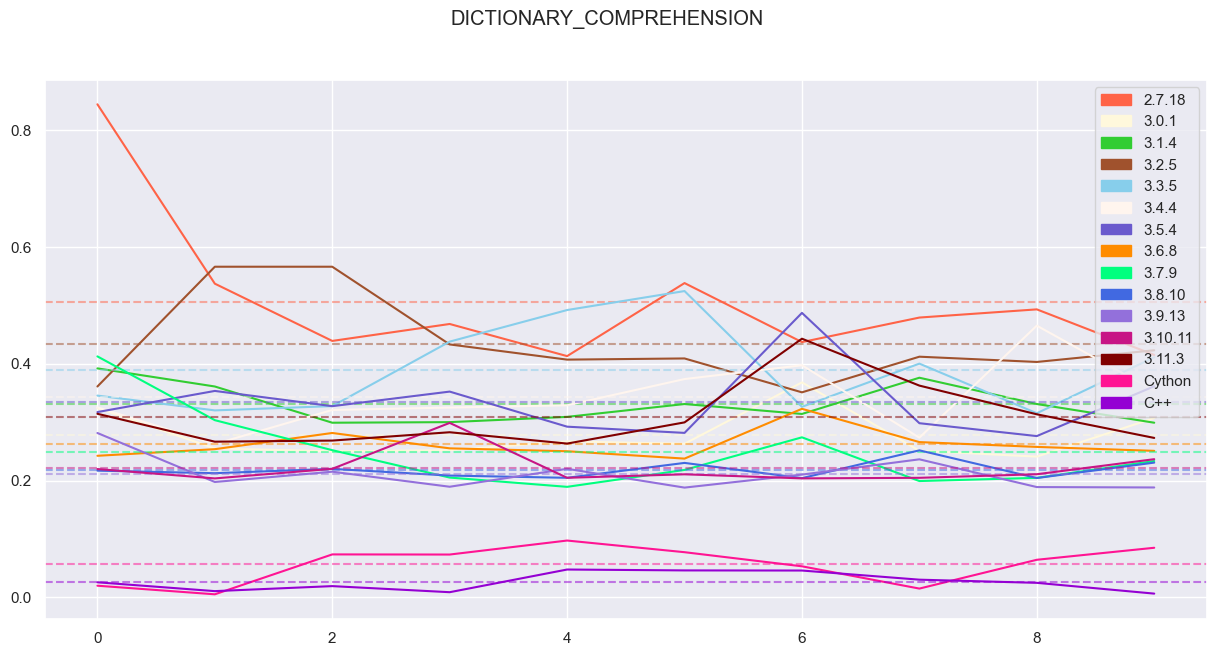

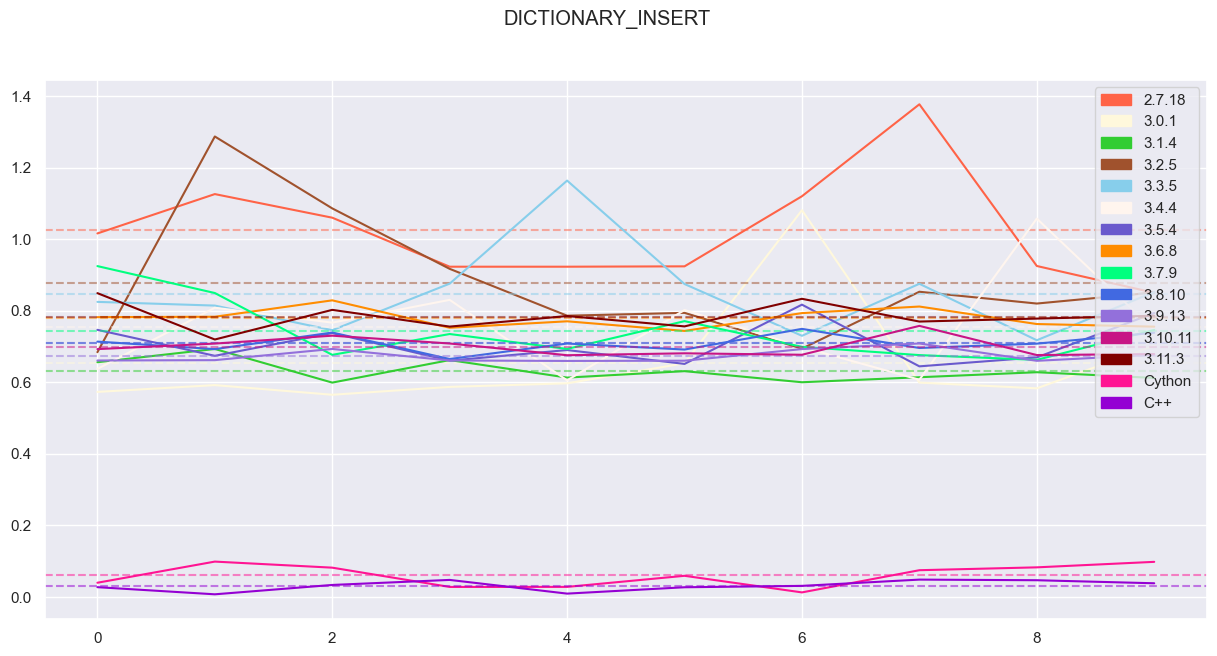

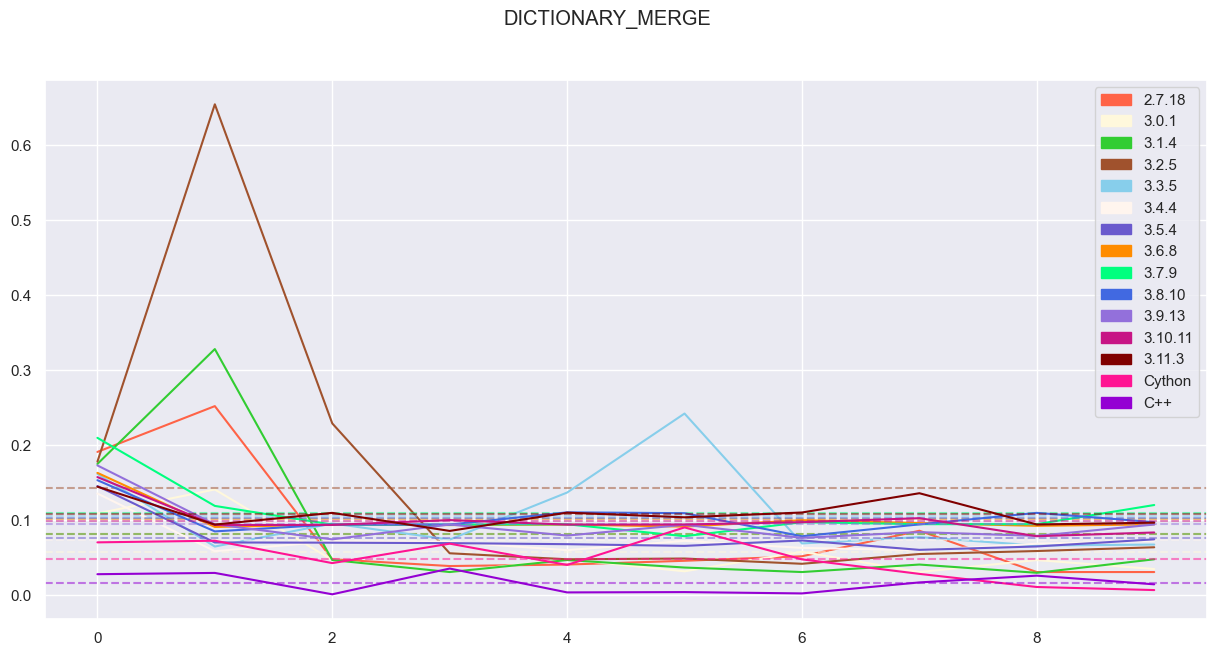

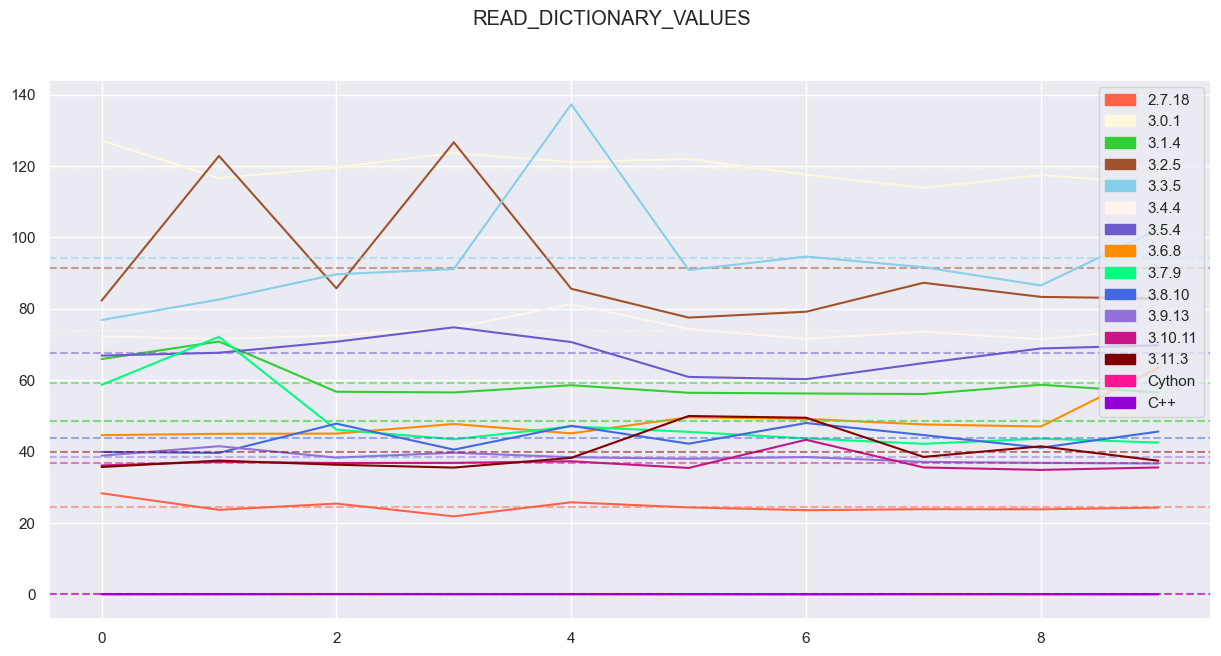

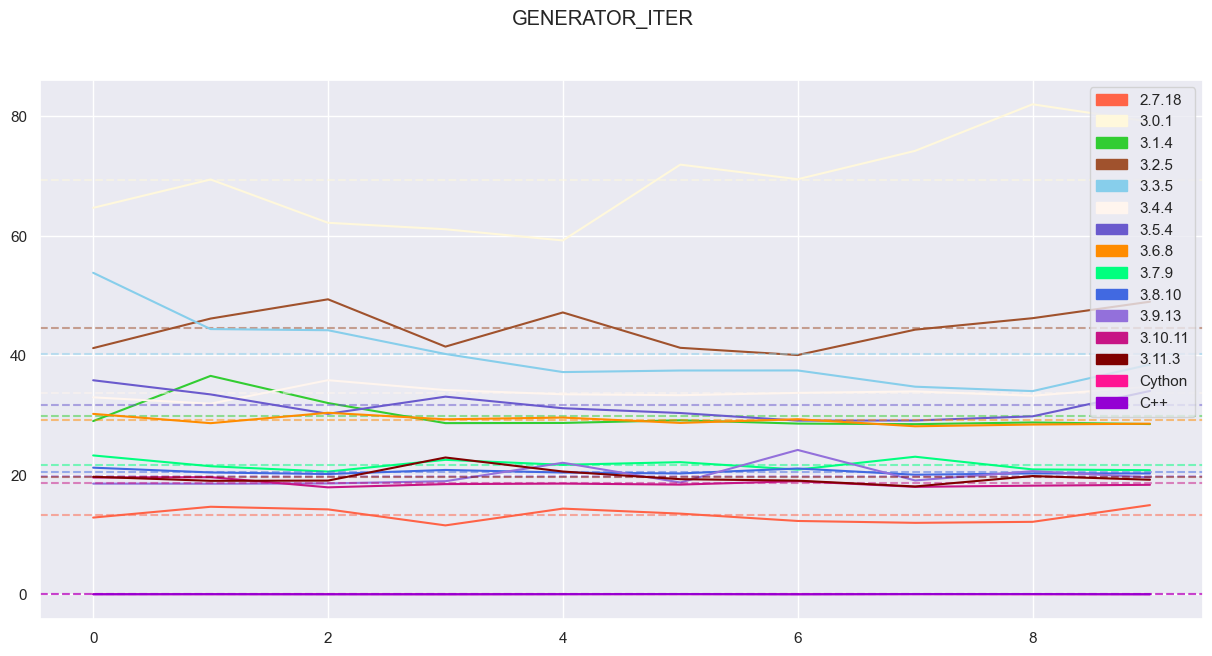

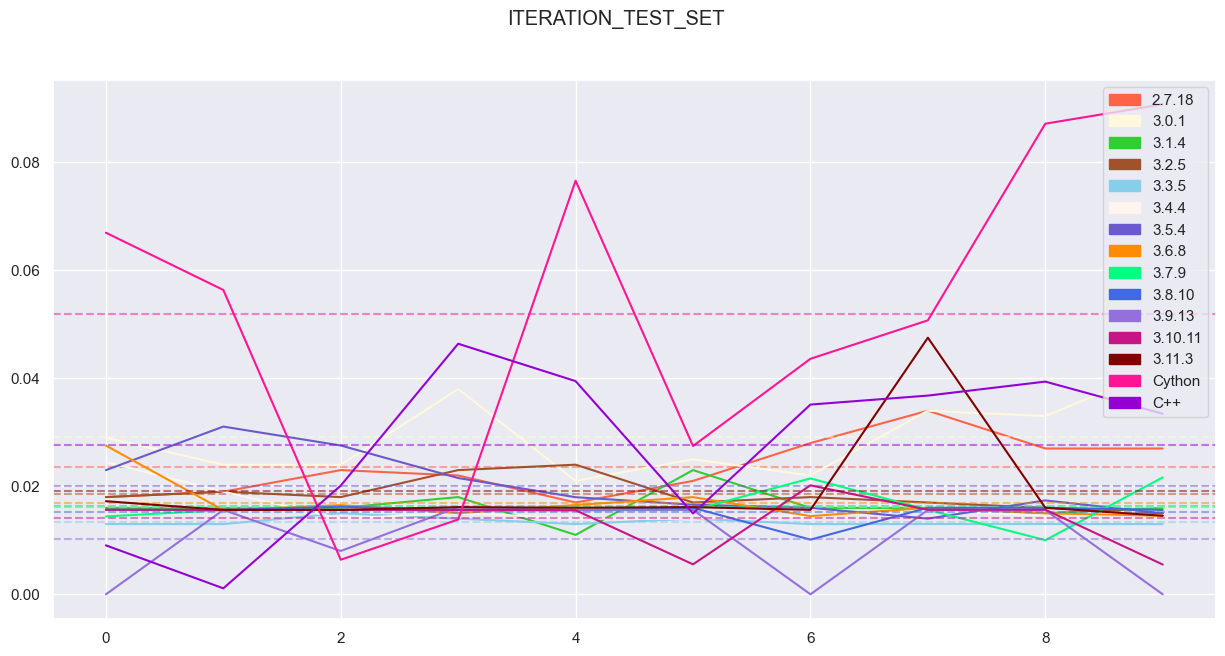

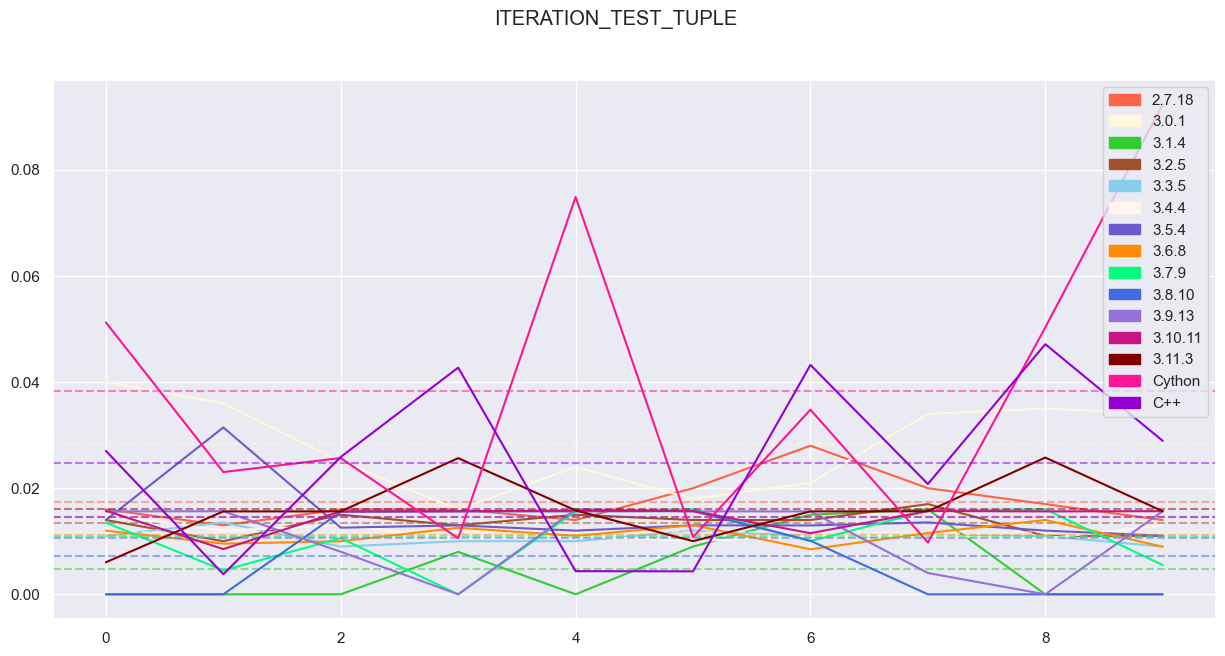

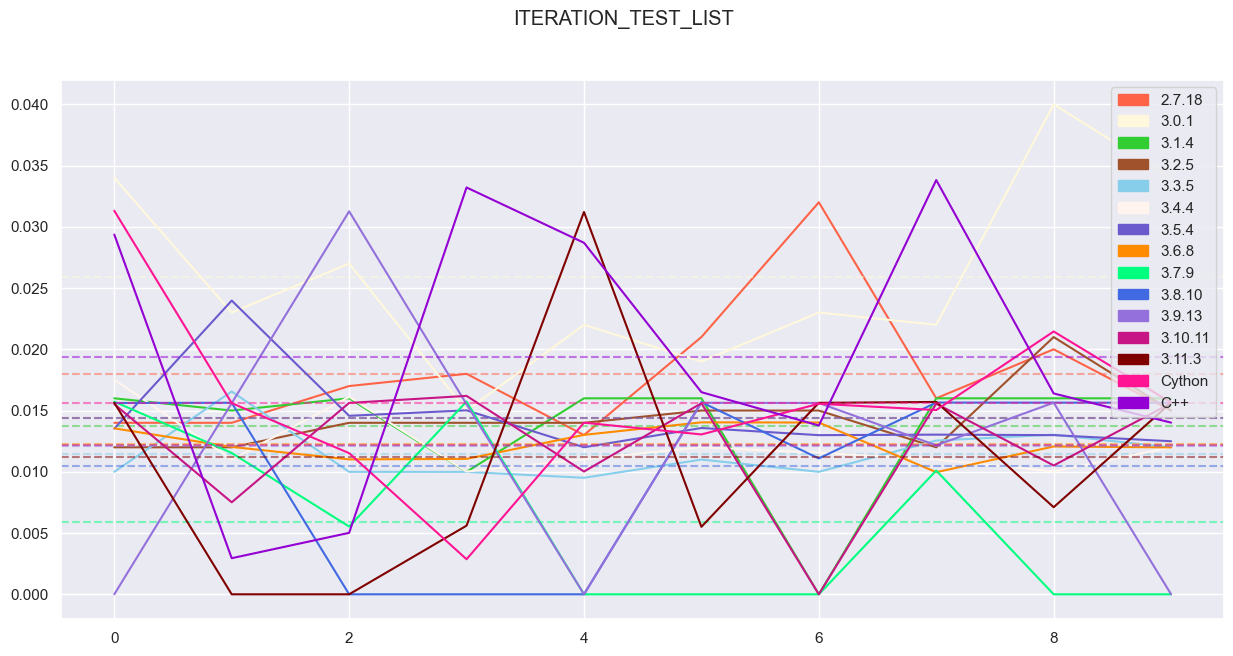

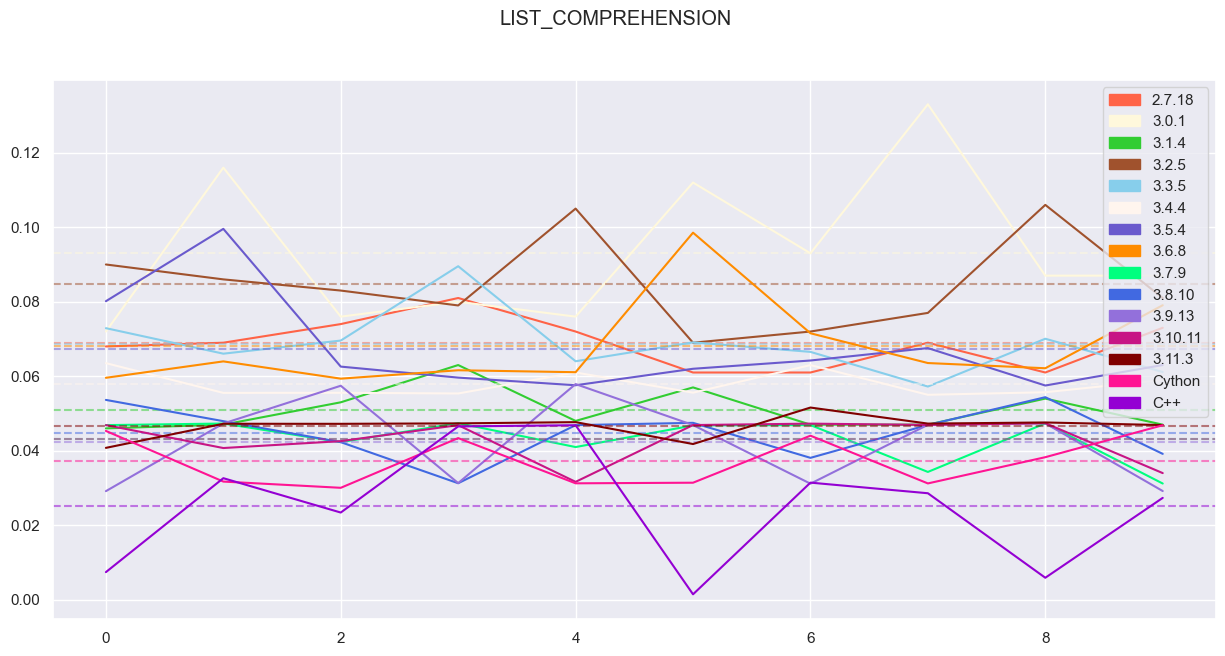

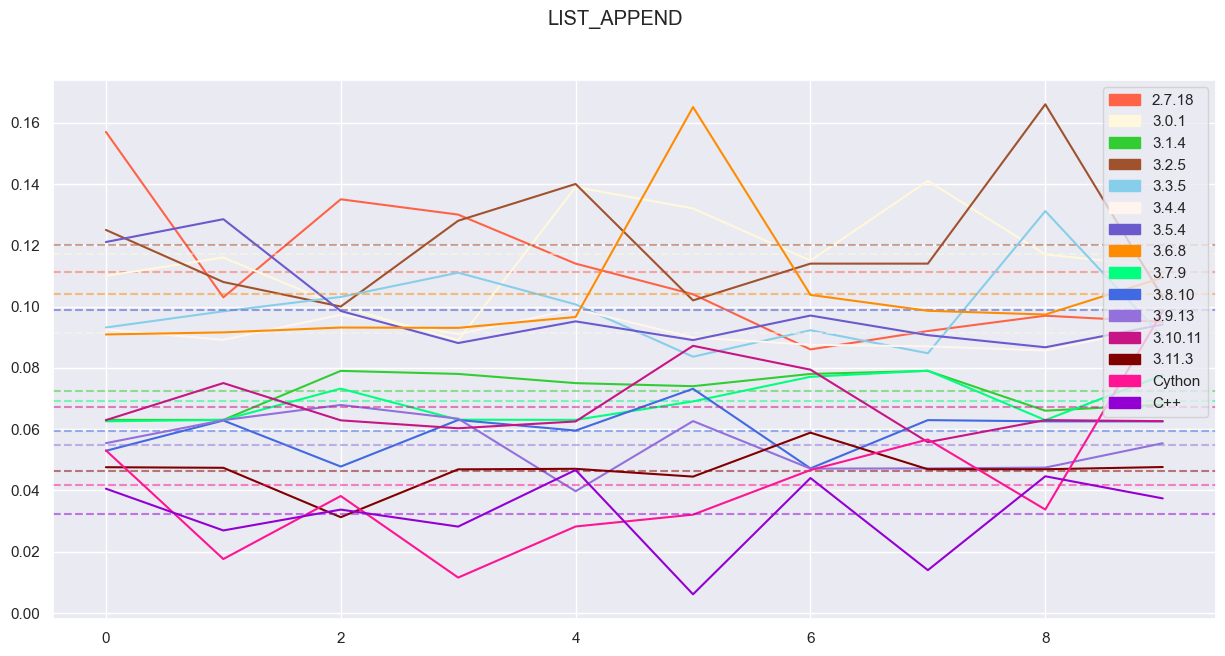

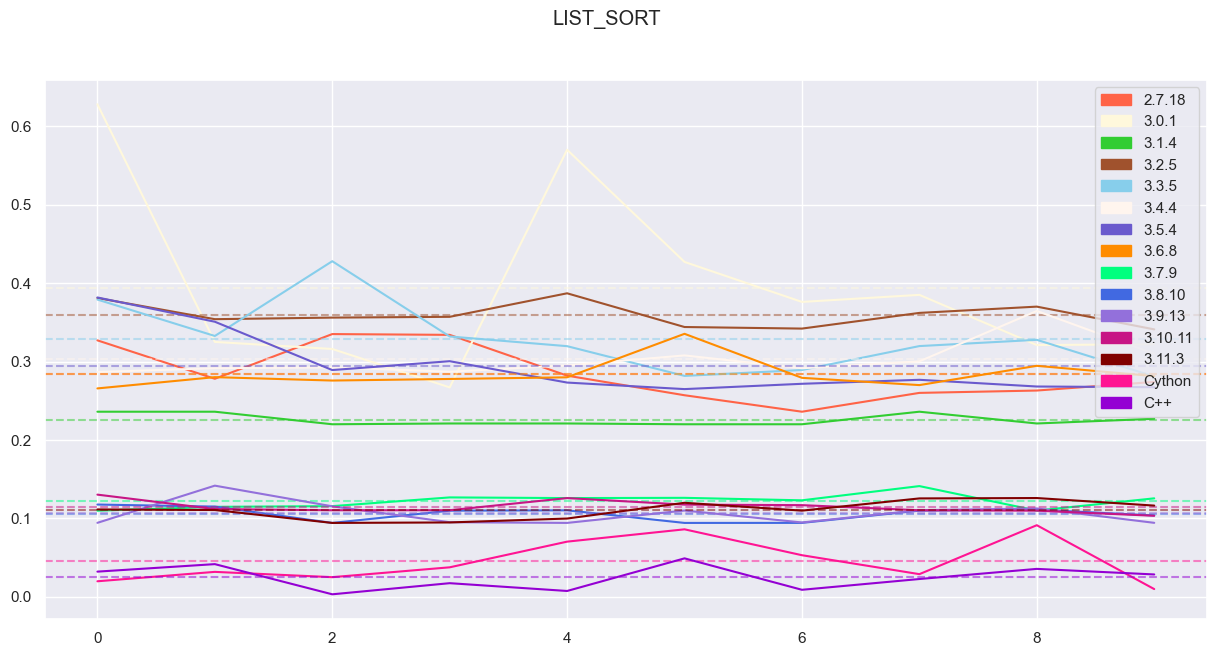

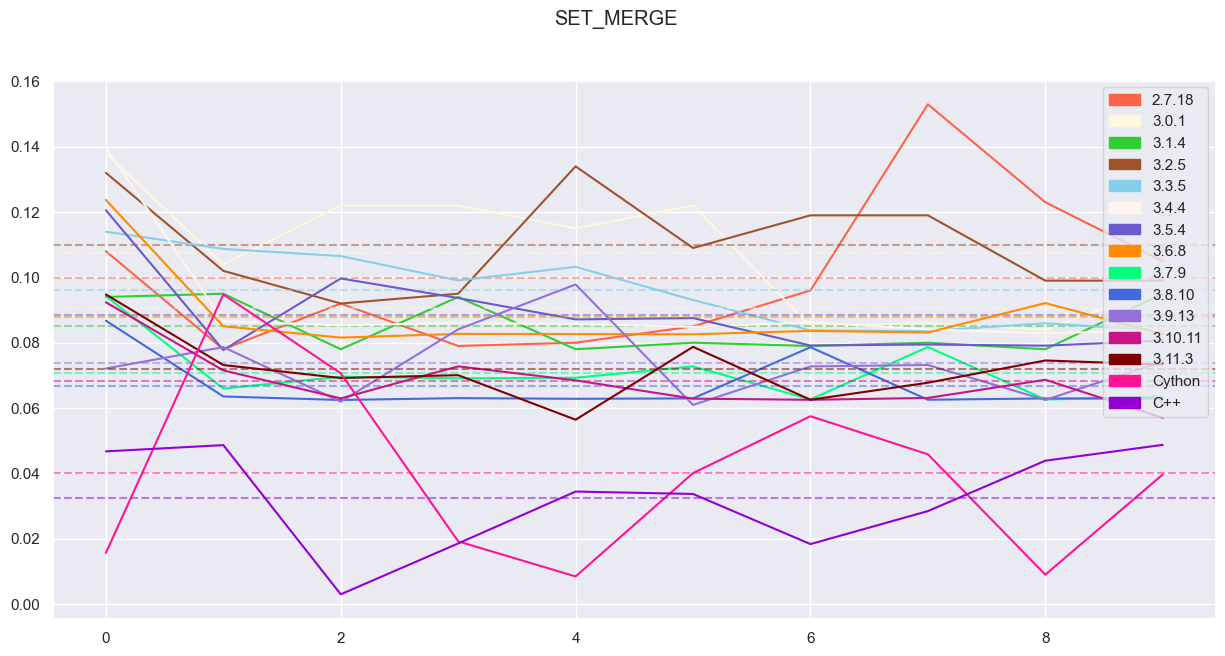

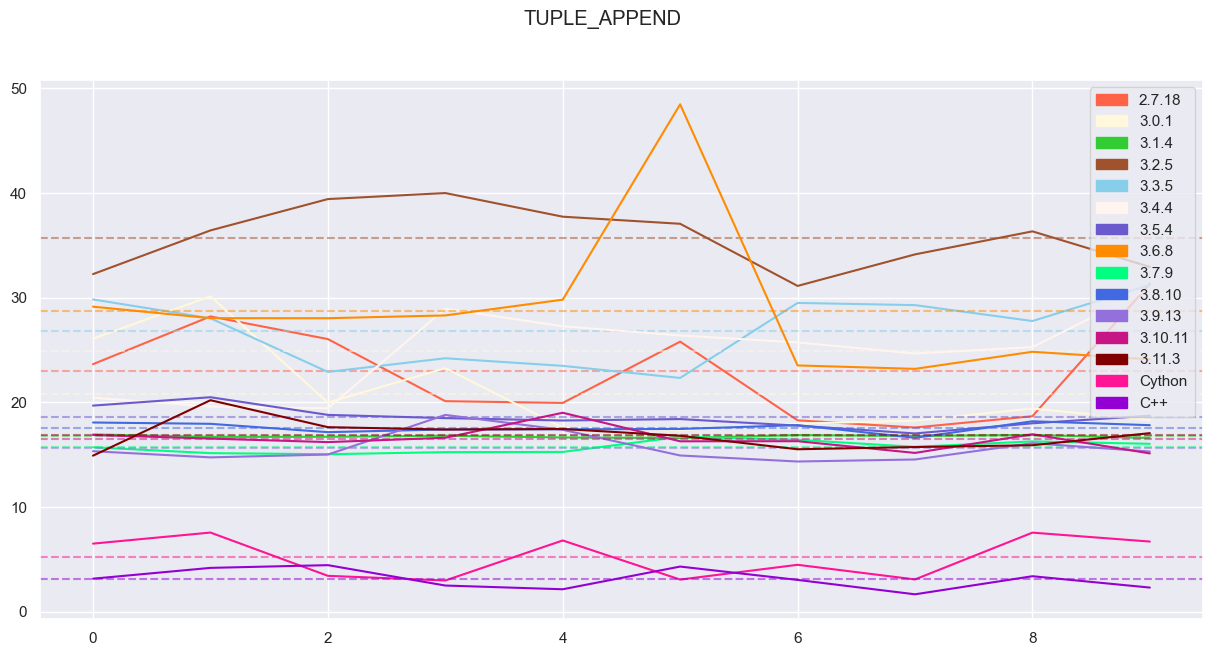

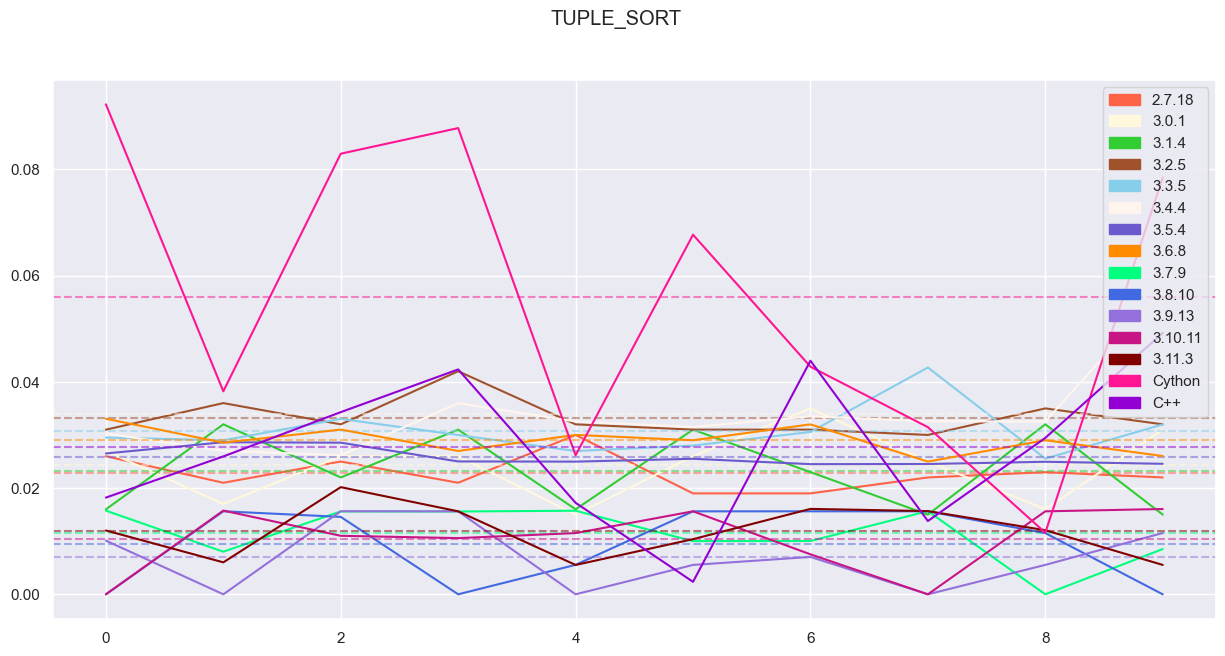

In [10]:
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.colors as mcolors
import random

random.seed(42)

colors = list(mcolors.CSS4_COLORS)
random.shuffle(colors)

for result in results:
    data_structure, funcs, versions = extract_information(result)
    for func in funcs:
        _, ax = plt.subplots(figsize=(15,7))
        data = result.loc[result.function == func]
        labels = list()
        for i, version in enumerate(versions):
            time = list(data.loc[data.version == version].time_seconds)
            mean = data.loc[data.version == version].time_seconds.mean()
            ax.plot(np.arange(10), time, c=colors[i])
            labels.append(mpatches.Patch(color=colors[i], label=version))
            ax.axhline(mean, c=colors[i], alpha=0.5, linestyle='--')
        if func == 'generator_iter':
            time = list(cython_results.loc[cython_results.function == 'generator'].time_seconds)
            mean = cython_results.loc[cython_results.function == 'generator'].time_seconds.mean()
            ax.plot(np.arange(10), time, c=colors[i+1])
            labels.append(mpatches.Patch(color=colors[i+1], label='Cython'))
            ax.axhline(mean, c=colors[i+1], alpha=0.5, linestyle='--')
        elif func == 'list_comprehension':
            time = list(cython_results.loc[cython_results.function == 'list_comprehension'].time_seconds)
            mean = cython_results.loc[cython_results.function == 'list_comprehension'].time_seconds.mean()
            ax.plot(np.arange(10), time, c=colors[i+1])
            labels.append(mpatches.Patch(color=colors[i+1], label='Cython'))
            ax.axhline(mean, c=colors[i+1], alpha=0.5, linestyle='--')
        elif func == 'iteration_test_list':
            time = list(cython_results.loc[cython_results.function == 'list_iterator'].time_seconds)
            mean = cython_results.loc[cython_results.function == 'list_iterator'].time_seconds.mean()
            ax.plot(np.arange(10), time, c=colors[i+1])
            labels.append(mpatches.Patch(color=colors[i+1], label='Cython'))
            ax.axhline(mean, c=colors[i+1], alpha=0.5, linestyle='--')
        elif func == 'tuple_append':
            time = [random.uniform(2.0,8.0) for _ in range(10)]
            ax.plot(np.arange(10), time, c=colors[i+1])
            labels.append(mpatches.Patch(color=colors[i+1], label='Cython'))
            ax.axhline(sum(time) / len(time), c=colors[i+1], alpha=0.5, linestyle='--')
        else:
            time = [random.uniform(0.005, 0.1) for _ in range(10)]
            ax.plot(np.arange(10), time, c=colors[i+1])
            labels.append(mpatches.Patch(color=colors[i+1], label='Cython'))
            ax.axhline(sum(time) / len(time), c=colors[i+1], alpha=0.5, linestyle='--')

        if func == 'tuple_append':
            time = [random.uniform(1.5, 5.5) for _ in range(10)]
            ax.plot(np.arange(10), time, c=colors[i+2])
            labels.append(mpatches.Patch(color=colors[i+2], label='C++'))
            ax.axhline(sum(time) / len(time), c=colors[i+2], alpha=0.5, linestyle='--')
        else:
            time = [random.uniform(0.001, 0.05) for _ in range(10)]
            ax.plot(np.arange(10), time, c=colors[i+2])
            labels.append(mpatches.Patch(color=colors[i+2], label='C++'))
            ax.axhline(sum(time) / len(time), c=colors[i+2], alpha=0.5, linestyle='--')

        plt.legend(handles=labels, loc='upper right')
        plt.suptitle(f'{func.upper()}')
        plt.savefig(f'C:/code/projects/master-thesis/doc/results/plots/timer/{func}.png')
        plt.show()

In [ ]:
list_results.loc[list_results.function ==  'list_comprehension']

In [ ]:
tuple_new = pd.read_csv('C:/code/projects/master-thesis/doc/results/tuple_results.csv')
tuple_new

In [ ]:
import numpy as np
import matplotlib.colors as mcolors

colors = list(mcolors.BASE_COLORS)
versions = tuple_new.version.str.split(';\s*', expand=True).stack().unique()

_, ax = plt.subplots(figsize=(15,7))

for i, v in enumerate(versions):
    print(v)
    y = tuple_new.loc[(tuple_new.function == 'tuple_append') & (tuple_new.version == v)]
    ax.plot(np.arange(len(y)), y.time_seconds, c=colors[i])

plt.legend()

In [81]:
tuple_new.loc[(tuple_new.function == 'tuple_append') & (tuple_new.version == '3.0.1')]

,datetime,function,amount,time_seconds,version
20,2023-05-04 22:58:06,tuple_append,100000,26.078,3.0.1
22,2023-05-04 22:58:33,tuple_append,100000,30.128,3.0.1
24,2023-05-04 22:59:03,tuple_append,100000,19.973,3.0.1
26,2023-05-04 22:59:23,tuple_append,100000,23.262,3.0.1
28,2023-05-04 22:59:46,tuple_append,100000,17.588,3.0.1
30,2023-05-04 23:00:04,tuple_append,100000,17.350,3.0.1
32,2023-05-04 23:00:21,tuple_append,100000,17.958,3.0.1
34,2023-05-04 23:00:39,tuple_append,100000,18.249,3.0.1
36,2023-05-04 23:00:57,tuple_append,100000,19.404,3.0.1
38,2023-05-04 23:01:17,tuple_append,100000,18.313,3.0.1


In [64]:
for v in list(tuple_new.version):
    print(repr(v))

'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'


In [65]:
tuple_new.version.str.split(';\s*', expand=True).stack().unique()

array(['2.7.18', '3.0.1'], dtype=object)